## 1121 Machine Learning HW1 房價預測 

### Outline

本次使用Linear Regression方法以及已知的dataframe完成房價預測作業，利用修改train_test_split內的hyperparameters找出最佳的r2_score。我利用for loop改變test_size以及random_state的值，並找出最佳結果為test_size = 0.01, random_state = 73時，r2_score有最佳值0.951800772351036
<hr>

### Method

#### Step 1. Import modules
引入需要使用到的model，在此使用pandas, numpy, matplotlib, seaborn

In [150]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<hr>

#### Step 2. Import and Observing dataset
df (dataframe)為資料檔(dataset)，在此直接使用公開網址讀取資料，亦可將檔案存於電腦內部資料夾，並使用其路徑作為資料來<br>

以下為關於df.head()的一些用法
```python
df.head()      #()內未設定，則預設為前5筆資料(在此範例中為0~4，共5筆)
df.head(int n) #代表顯示前n筆資料，如下
df.head(10)    #代表前10筆資料，此步驟不影響後續學習過程，僅顯示已知資料內容
```


In [151]:
#import dataset
df = pd.read_csv("https://raw.githubusercontent.com/ryanchung403/dataset/main/Housing_Dataset_Sample.csv")

#observing dataset
df.head() #default (no variable) is the top 5 data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<hr>

#### Step 3. Get the data X and y

從dataset中取出X和y，X表示「所有可能影響預測結果的變因(all possible influence variables)」，y表示「預測目標值(the target)」<br>

以下為關於此部分語法的說明
```python
#.iloc可取出特定資料範圍，其變數設定如下
df.iloc[row_start : row_end, col_start : col_end]

#start代表開始的行或列，未設定代表0(最開頭)
#end代表結束的行或列；若未設定代表最後
#注意：讀取範圍為start至end-1筆資料，不包含end自己
```

In [152]:
X = df.iloc[:,:5]  #X gets all rows (0~4999) and 5 columns (0~4)
y = df.iloc[:,5:6] #y gets all rows (0~4999) and 1 columns (5), the 5th column is 'Price'
# y = df['Price']  #y only gets the data from the column which name is 'Price'

In [153]:
X #Show the result of X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [154]:
y #Show the result of y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


<hr>

#### Step 4. Split the data into training dataset and testing dataset

```python
#train_test_split()可從資料中隨機分出特定訓練(training)與測試(testing)資料
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

test_size及train_size分別代表要從資料長度中區分多少比例(float (0, 1])或數量(int 1~length)作為testing data與training data；若皆未設定，則預設test_size為0.25<br>

random_state為種子碼(seed)，每個數字代表一種隨機方法，**相同random_state可使每次產生的結果相同；若未設定該parameter，則每次預測結果將會不同**

以下範例僅**改變test_size及random_state兩個hyperparameters**

<hr>

#### Step 5-1. Find the best forecast result

此處使用double for loop，每次以0.01改變test_size以及每次以1改變random_state兩變數，共計產生9900筆預測結果，詳細結果見最下方。<br>

經統計後發現test_size = 0.01, random_state = 73時有最佳的r2_score，在此情況下training set有4950筆資料(5000\*0.99)，而testing set有50筆資料(5000\*0.01)

In [164]:
#import some useful function
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#initialize the best case
best = 0
best_i = 1
best_j = 0

for i in range(1, 100, 1):
    for j in range(0, 100, 1):

        #split to training data & testing data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=j)

        #use linear regression model
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        #get the result
        predictions = reg.predict(X_test)
        
        #caculate the r2_score of the actual value and predicions
        #if we find a better case, update the best case and record the test_size and random_state
        if r2_score(y_test, predictions) > best:
            best = r2_score(y_test, predictions)
            best_i = i/100
            best_j = j

print('The best case is test_size=', best_i , ', random_state=' , best_j , ', r2_score=' , best)

The best case is test_size= 0.01 , random_state= 73 , r2_score= 0.9518007723510367


以下開始為上部分程式碼帶入test_size = 0.01, random_state = 73之運行結果與詳細資料

In [156]:
from sklearn.model_selection import train_test_split

#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=73)

In [157]:
X_train #Show the data of X_train (4950 rows)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1976,73370.742153,5.347823,6.090956,2.24,56541.409885
4127,69288.098769,6.515150,7.750123,5.39,52969.633397
842,65855.863238,6.564119,7.709618,6.40,45528.537237
4273,54203.300825,7.298337,6.204287,2.49,60388.344248
4623,73804.908618,6.731999,7.617261,4.25,40877.189120
...,...,...,...,...,...
321,76192.656036,7.303750,7.337590,6.33,21245.841619
4419,76186.847218,7.418553,7.470558,5.02,30829.905953
394,66041.123580,6.493917,8.219394,5.15,40163.970834
4014,78646.308678,4.084092,7.768766,4.40,17551.706389


In [158]:
X_test  #Show the data of X_test (50 rows)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
863,67858.501661,4.948624,6.228656,3.34,29708.758081
4411,54341.153802,3.753907,7.157120,4.19,30542.212253
4020,76856.303857,5.507289,6.465832,4.38,29382.089788
111,67579.234794,5.973219,7.754358,6.32,21762.949686
2576,61249.567095,4.177550,6.395310,3.16,30288.698546
3460,89088.607905,6.023281,6.794409,3.33,37044.858147
3904,69489.403429,3.394291,7.861659,5.34,28389.597501
942,86611.178018,4.849507,8.303302,3.01,45359.027954
3320,65363.746493,6.752351,9.257404,4.11,48714.690332
1999,73789.890483,6.614956,6.259547,2.29,47039.092275


In [159]:
y_train #Show the data of y_train (4950 rows)

,Price
1976,1.386351e+06
4127,1.782804e+06
842,1.477765e+06
4273,1.394901e+06
4623,1.574212e+06
...,...
321,1.432757e+06
4419,1.553459e+06
394,1.385400e+06
4014,9.209516e+05


In [160]:
y_test #Show the data of y_test (50 rows)

,Price
863,8.576971e+05
4411,4.374361e+05
4020,1.254938e+06
111,1.170960e+06
2576,6.787219e+05
3460,1.629050e+06
3904,6.944721e+05
942,1.668671e+06
3320,1.775531e+06
1999,1.361230e+06


<hr>

#### Step 5-2. Find the best forecast result

使用Linear Regression帶入X_train與y_train完成預測模型，接著將X_test帶入Regression之模型並預測房價(preditions)，最後將實際房價(Y_test)與預測結果(preditions)對比得到r2_socre，越高分代表預測模型越精準，讚！

In [168]:
#use linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

#use the regression result and X_test dataset to predict y (preditions)
predictions = reg.predict(X_test)

#caculate the r2_score of the actual value and predicions
from sklearn.metrics import r2_score
print('r2_score is', r2_score(y_test, predictions))

r2_score is 0.9051730041179469


<hr>

### Result

分析結果如下，我將每個test_size與其中最佳的r2_socre作圖(考量到random_state只是一種隨機方式，並非有實際意義上的變數，故每個test_size僅找出一個最佳值)，可發現當test_size越大(train_size越小)，r2_socre越低。<br>


|     | test_size  | random_state | r2_score |
|:----:|:----:|:----:|:----:|
|**Best**| 0.01 | 73 | 0.951800772351036 |
|**Worst**| 0.99 | 94 | 0.915544359060255 |


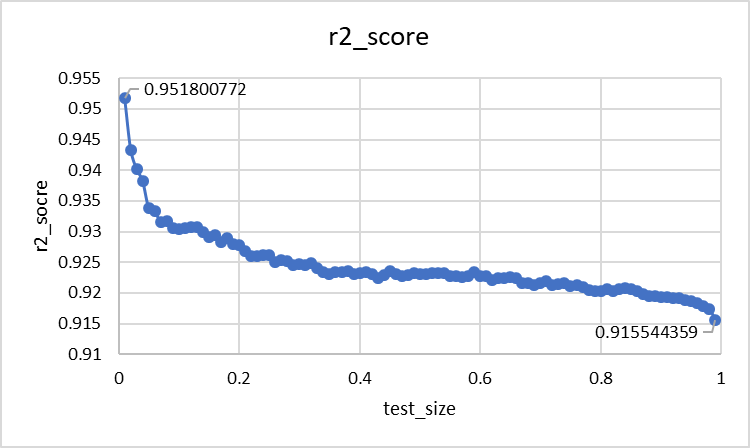

<hr>

### Conclusion

根據上文之作圖結果，整體r2_score隨test_size比例增加而降低，因此當**training set越大，也就是具備越多資料提供模型訓練，其模型準確度越高**